* `Import Libraries`

In [ ]:
## main
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

## other
from imblearn.over_sampling import SMOTE

## skelarn -- preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## skelarn -- models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## sklearn -- metrics
from sklearn.metrics import f1_score, confusion_matrix

## sklearn -- tuning
from sklearn.model_selection import GridSearchCV

---

* `Read the Dataset` 

[data link](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling)

In [2]:
## Read the Dataset
TRAIN_PATH = os.path.join(os.getcwd(), 'data', 'dataset.csv')
df = pd.read_csv(TRAIN_PATH)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Drop first 3 features
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
## stats
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


---

* `EDA`

In [6]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
## Geography
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
## Gender
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
## Taregt
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
## DataTypes
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

---

* `Data Viz & Handling Outliers`

* `Univariate Viz`

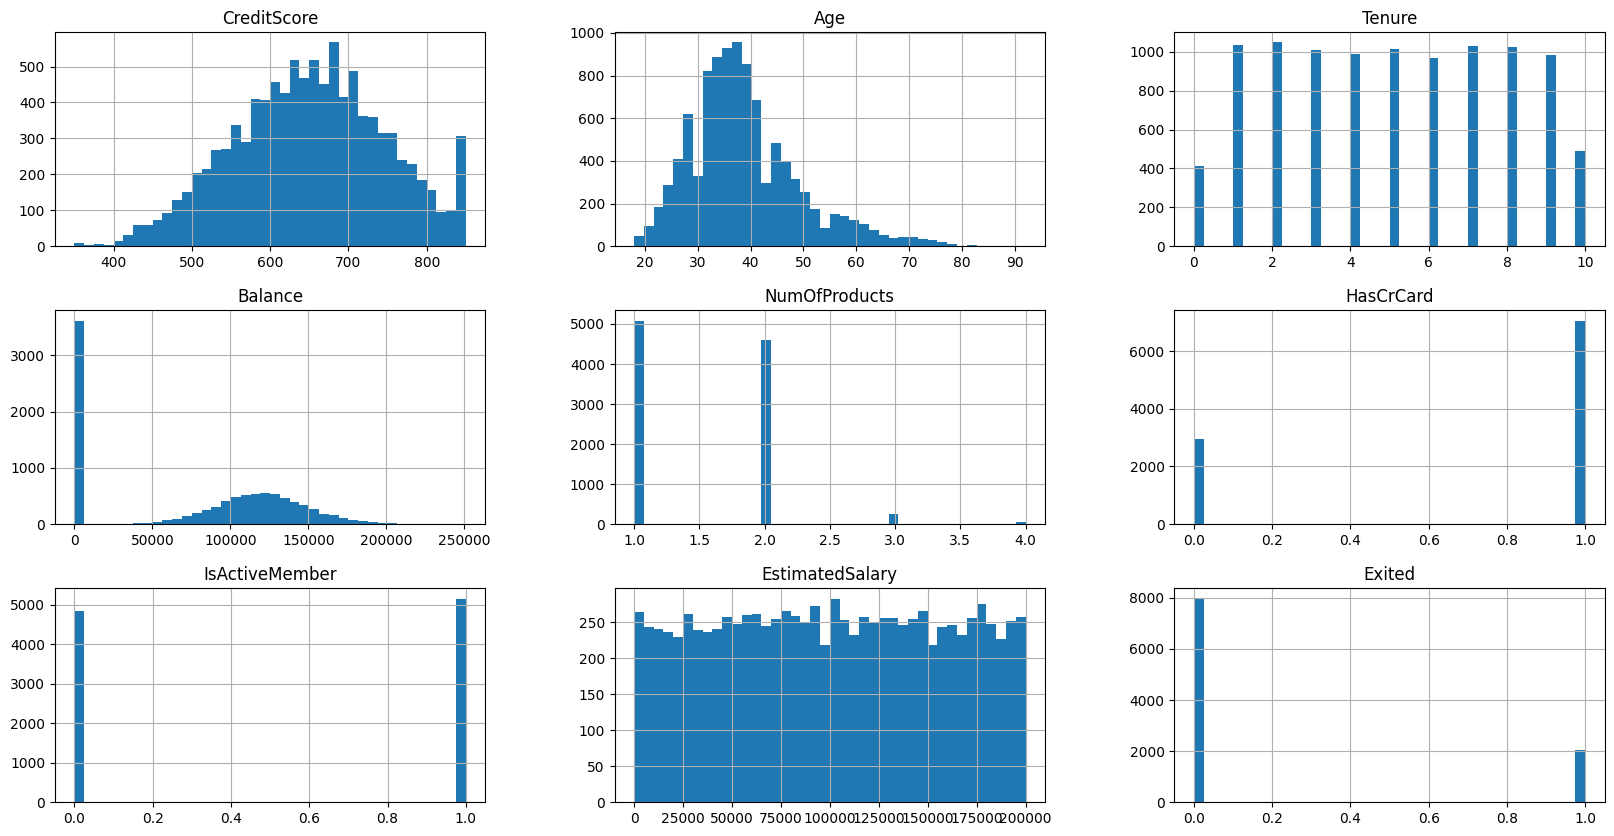

In [11]:
## Numerical
df.hist(bins=40, figsize=(20, 10))
plt.show()

In [12]:
## Filtering using Age Feature using threshold
df.drop(index=df[df['Age'] > 80].index.tolist(), axis=0, inplace=True)

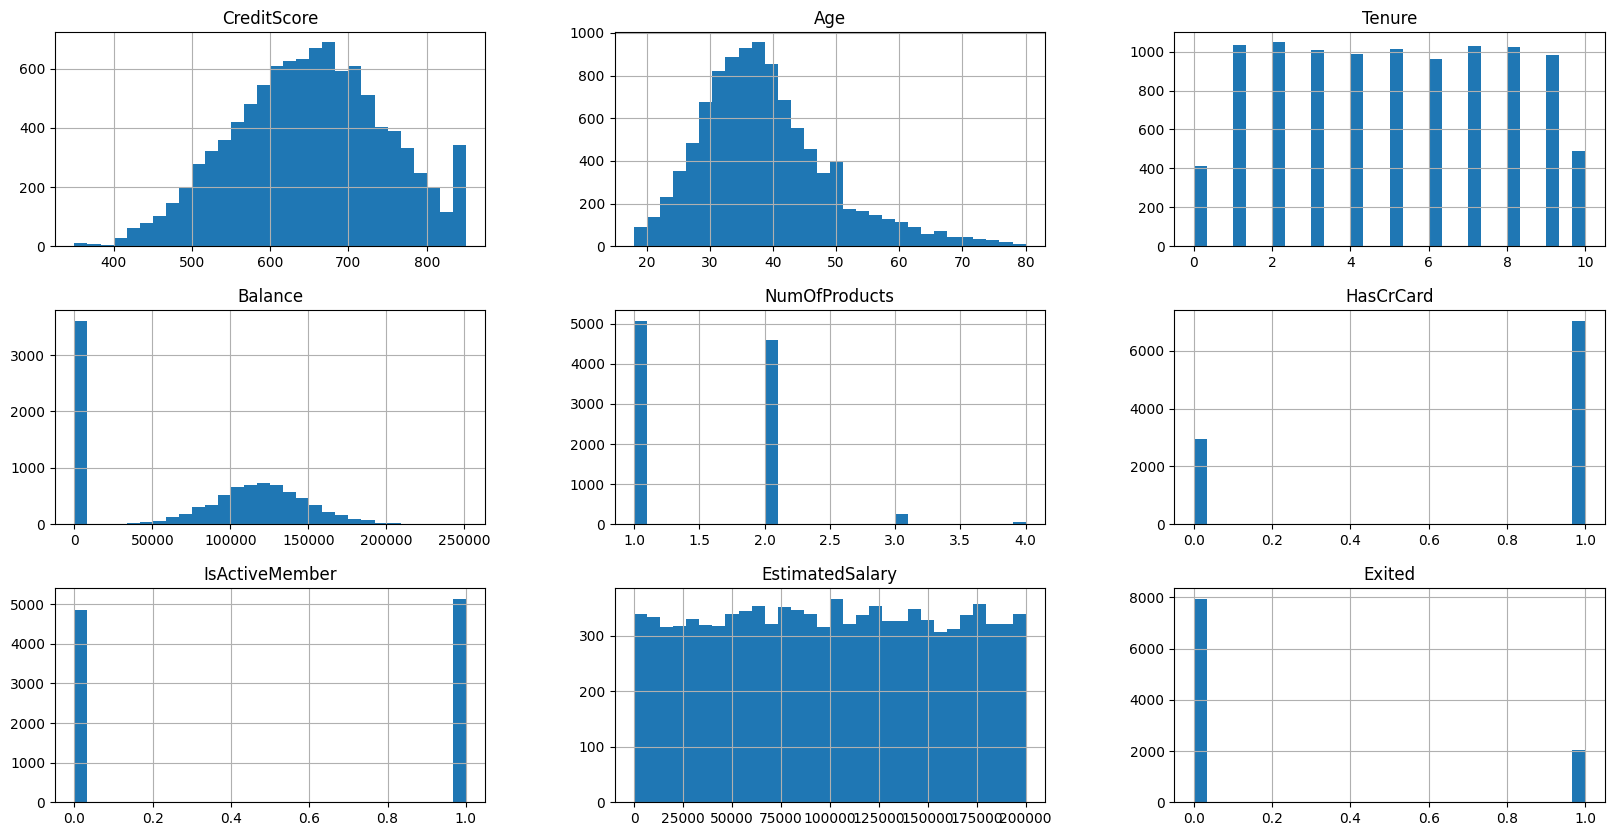

In [13]:
## Numerical distr after above cell
df.hist(bins=30, figsize=(20, 10))
plt.show()

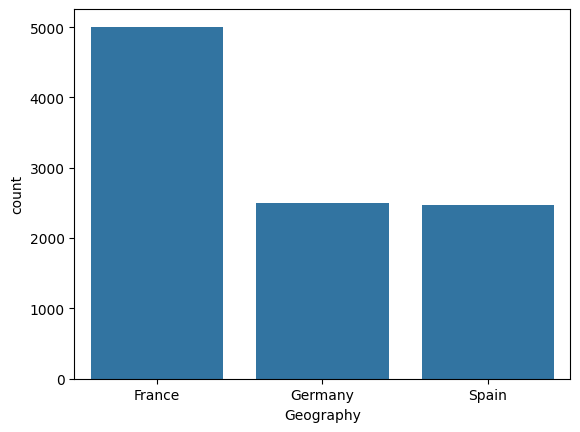

In [14]:
## countplot
sns.countplot(data=df, x='Geography', order=df['Geography'].value_counts().index.tolist())  ## title, xlabel, ylabel
plt.show()

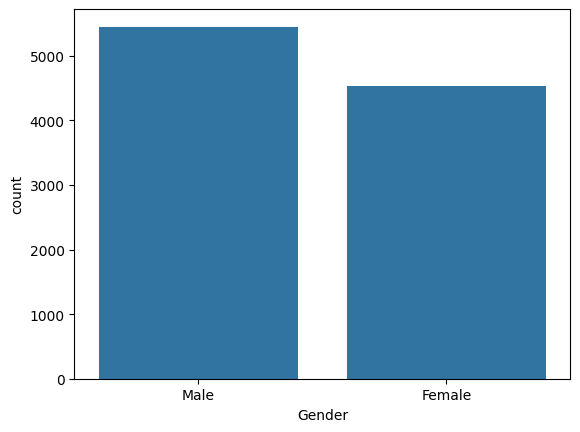

In [15]:
## counplot for Gender
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index.tolist())  ## title, xlabel, ylabel
plt.show()

<Axes: ylabel='EstimatedSalary'>

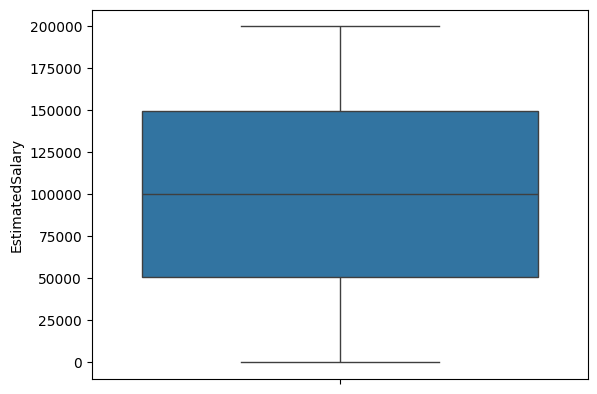

In [16]:
## Boxplot for (EstimatedSalary)
sns.boxplot(data=df, y='EstimatedSalary')

<Axes: xlabel='Exited', ylabel='count'>

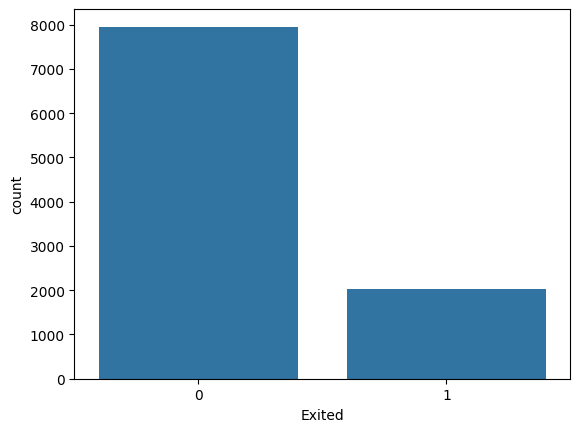

In [17]:
## countplot for Exited
sns.countplot(data=df, x='Exited')  ## title, xlabel, ylabel

* `Bivariate Viz`

In [18]:
## Averge salary per Gender
df[['Gender', 'EstimatedSalary']].groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100575.998277
Male       99671.901194
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

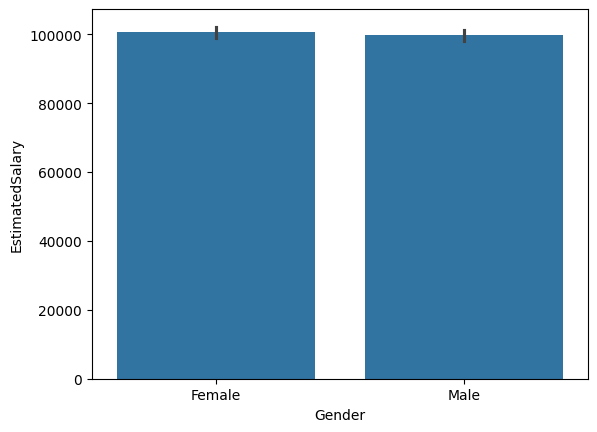

In [19]:
## using seaborn
sns.barplot(data=df, y='EstimatedSalary', x='Gender', estimator='mean')

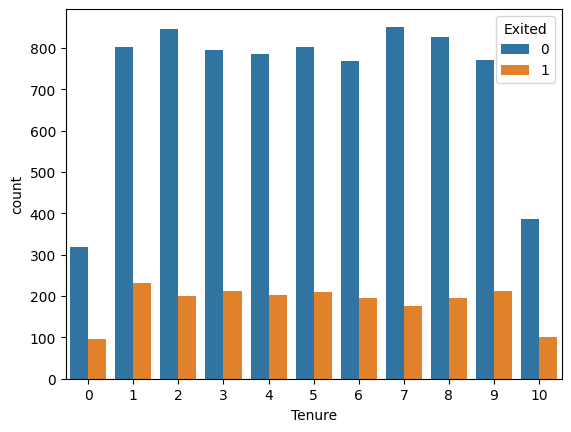

In [20]:
## Realation between Tenure and Exited
sns.countplot(data=df, x='Tenure', hue='Exited')  ## labels, title
plt.show()

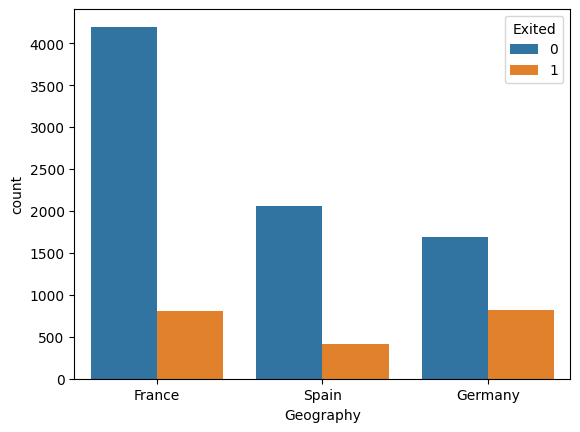

In [21]:
## Geography with Exited
sns.countplot(data=df,x='Geography', hue='Exited')  ## labels, titles
plt.show()

----

* `Split to train and test`

In [22]:
## To features and target
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

## Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45, stratify=y)

## Check shapes
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (7990, 10)
y_train.shape 	 (7990,)
******************************
X_test.shape 	 (1998, 10)
y_test.shape 	 (1998,)


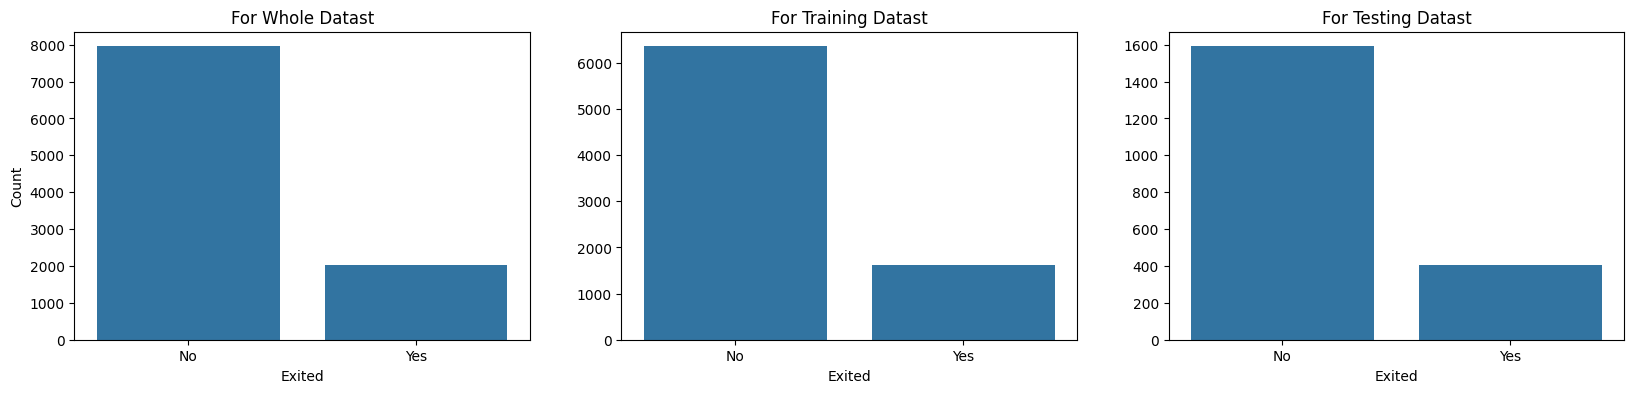

In [23]:
## plottting to check
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

## Whole dataset
plt.sca(ax[0])
sns.countplot(x=y)
plt.title('For Whole Datast')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## train
plt.sca(ax[1])
sns.countplot(x=y_train)
plt.title('For Training Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

## test
plt.sca(ax[2])
sns.countplot(x=y_test)
plt.title('For Testing Datast')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

----

* `Data Preprocessing & Pipeline`

In [24]:
## Slice the lists
num_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categ_cols = ['Gender', 'Geography']

ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(categ_cols))

In [26]:
## Pipeline

## Numerical: num_cols --> Imputing using median, and standardscaler
## Categorical: categ_cols ---> Imputing using mode, and OHE
## Ready_cols ---> Imputing mode

## For Numerical
num_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())
                ])

## For Categorical
categ_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('ohe', OneHotEncoder(drop='first', sparse_output=False))
                ])

## For ready cols
ready_pipeline = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent'))
                ])



## Combine all pipelines
all_pipeline = ColumnTransformer(transformers=[
                ('numerical', num_pipeline, num_cols),
                ('categorical', categ_pipeline, categ_cols),
                ('ready', ready_pipeline, ready_cols)
            ])


## fit and apply
all_pipeline.fit_transform(X_train)
X_train_final =  all_pipeline.transform(X_train)
X_test_final = all_pipeline.transform(X_test)

In [27]:
## Check train
X_train_final.shape, y_train.shape

((7990, 11), (7990,))

In [28]:
## Check test
X_test_final.shape, y_test.shape

((1998, 11), (1998,))

In [30]:
## Create a folder for the models and any needed pipelines
ASSETS_FOLDER_PATH = os.path.join(os.getcwd(), '..', 'assets')
os.makedirs(ASSETS_FOLDER_PATH, exist_ok=True)

In [31]:
## Dump the combined pipeline
joblib.dump(all_pipeline, os.path.join(ASSETS_FOLDER_PATH, 'preprocessor.pkl'))

['d:\\Private\\AI MAIN\\02- Private AGOOR\\_AGOOR Sheets\\General Code\\Wakeb-Task\\Churn-LLM\\src\\notebooks\\..\\assets\\preprocessor.pkl']

----

* `Deal with imbalnced dataset`

`We have three options:`
* `Method (1) -> Do not do any thing regarding the imbalnced data`
* `Method (2) -> Using class_weights parameters in most of algorithms to control classes weights`
* `Method (3) -> Using Imbalnced Library and use SMOTE Algorithm to increase the minority classes`

In [32]:
## 2. prepare class_weights for solving imbalance dataset
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / np.sum(vals_count)  ## normalizing
vals_count

dict_weights = {}
for i in range(2):  ## 2 classes (0, 1)
    dict_weights[i] = vals_count[i]

## to model
dict_weights

{0: 0.20387984981226537, 1: 0.7961201501877346}

In [33]:
## 3. Using SMOTE for over sampling --> Apply only on train data
over = SMOTE(sampling_strategy=0.7)
X_train_resmapled, y_train_resampled = over.fit_resample(X_train_final, y_train)

In [34]:
## Shape of Train Data after resamples
X_train_resmapled.shape, y_train_resampled.shape

((10813, 11), (10813,))

In [35]:
y_train_resampled.value_counts()   ## Nice ~ 0.7

Exited
0    6361
1    4452
Name: count, dtype: int64

------

* `Building Models`
> Let's consider the evaluation metric to be `f1_score`

* `1. Using Logistic Regression`

In [36]:
## 1. Using logisit --> with considering the imabalancing data using class_weights
log_clf = LogisticRegression(C=1.5, max_iter=10000, penalty='l2', class_weight=dict_weights)
log_clf.fit(X_train_final, y_train)

## Predict and evaluate
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

## Using f1_score
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'The f1_score using Logistic model for Training Dataset with class_weigths is: {score_train_log*100:.3f} %')
print(f'The f1_score using Logistic model for Testing Dataset with class_weigths is: {score_test_log*100:.3f} %')

The f1_score using Logistic model for Training Dataset with class_weigths is: 49.814 %
The f1_score using Logistic model for Testing Dataset with class_weigths is: 49.915 %


In [37]:
## 3. Using logisit --> with considering the imabalancing data using oversampled data (SMOTE)
log_clf = LogisticRegression(C=1.5, max_iter=10000, penalty='l2')
log_clf.fit(X_train_resmapled, y_train_resampled)

## Predict and evaluate
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_test_final)

## Using f1_score
score_train_log = f1_score(y_train, y_pred_train_log)
score_test_log = f1_score(y_test, y_pred_test_log)

print(f'The f1_score using Logistic model for Training Dataset with SMOTE is: {score_train_log*100:.3f} %')
print(f'The f1_score using Logistic model for Testing Dataset with SMOTE is: {score_test_log*100:.3f} %')

The f1_score using Logistic model for Training Dataset with SMOTE is: 49.314 %
The f1_score using Logistic model for Testing Dataset with SMOTE is: 50.675 %


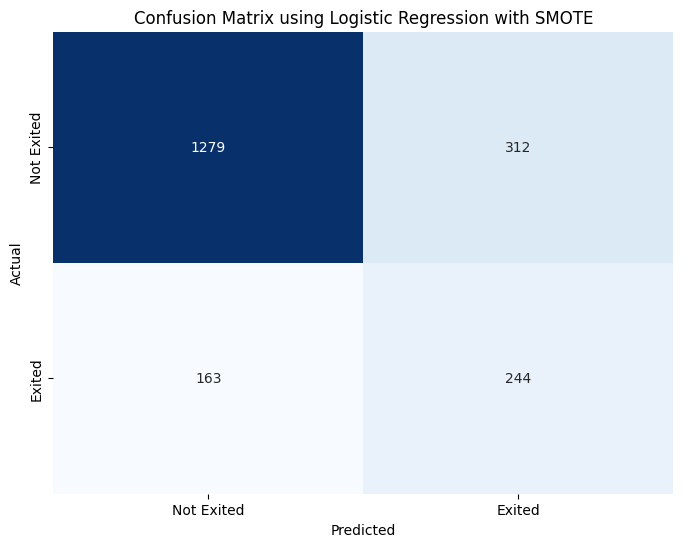

In [38]:
## Confusion Matrix using Logistic Regression with SMOTE
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_log), annot=True, cbar=False,
            fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix using Logistic Regression with SMOTE')
plt.show()

---

* `2. Using Naive-Bayes`

In [39]:
## Using Naive Bayes --> With considering the imabalancing data using oversampled data (SMOTE)
gauss_nb = GaussianNB()
gauss_nb.fit(X_train_resmapled, y_train_resampled)

## Predict and evaluate
y_pred_train_gauss_nb = gauss_nb.predict(X_train_final)
y_pred_test_gauss_nb = gauss_nb.predict(X_test_final)

## Using f1_score
score_train_gauss_nb = f1_score(y_train, y_pred_train_gauss_nb)
score_test_gauss_nb = f1_score(y_test, y_pred_test_gauss_nb)

print(f'The f1_score using Gaussian-NB model for Training Dataset with SMOTE is {score_train_gauss_nb*100:.3f} %')
print(f'The f1_score using Gaussian-NB model for Testing Dataset with SMOTE is {score_test_gauss_nb*100:.3f} %')

The f1_score using Gaussian-NB model for Training Dataset with SMOTE is 51.188 %
The f1_score using Gaussian-NB model for Testing Dataset with SMOTE is 51.187 %


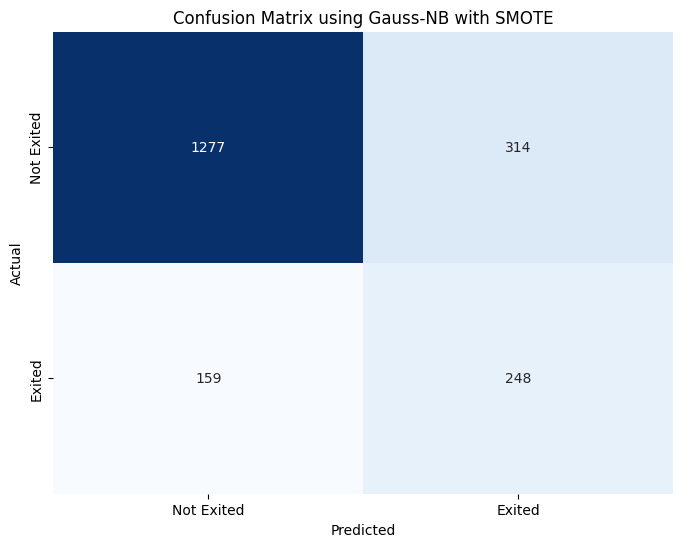

In [40]:
## Confusion Matrix using NB with SMOTE
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_gauss_nb), annot=True, cbar=False,
            fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix using Gauss-NB with SMOTE')
plt.show()

-----

* `2. RandomForest`

In [41]:
## 1. Using RF --> with considering the imabalancing data using class_weights
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45, class_weight=dict_weights)
forst_clf.fit(X_train_final, y_train)

## Predict and evaluate
y_pred_train_forest = forst_clf.predict(X_train_final)
y_pred_test_foerst = forst_clf.predict(X_test_final)

## Using f1_score
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_foerst)

print(f'The f1_score using RF model for Training Dataset with class_weights is: {score_train_forest*100:.3f} %')
print(f'The f1_score using RF model for Testing Dataset with class_weights is: {score_test_forest*100:.3f} %')

The f1_score using RF model for Training Dataset with class_weights is: 60.343 %
The f1_score using RF model for Testing Dataset with class_weights is: 58.258 %


In [42]:
## 2. Using RF --> with considering the imabalancing data using oversampled data (SMOTE)
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
forst_clf.fit(X_train_resmapled, y_train_resampled)

## Predict and evaluate
y_pred_train_forest = forst_clf.predict(X_train_final)
y_pred_test_forest = forst_clf.predict(X_test_final)

## Using f1_score
score_train_forest = f1_score(y_train, y_pred_train_forest)
score_test_forest = f1_score(y_test, y_pred_test_forest)

print(f'The f1_score using RF model for Training Dataset with SMOTE is: {score_train_forest*100:.3f} %')
print(f'The f1_score using RF model for Testing Dataset with SMOTE is: {score_test_forest*100:.3f} %')

The f1_score using RF model for Training Dataset with SMOTE is: 61.559 %
The f1_score using RF model for Testing Dataset with SMOTE is: 59.740 %


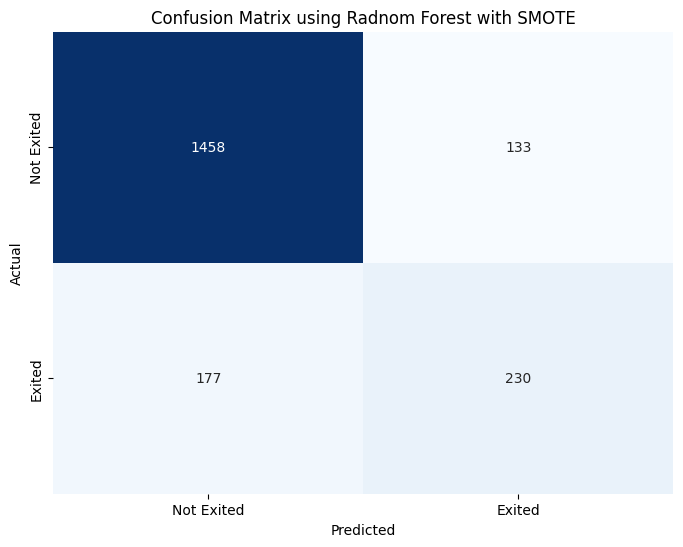

In [43]:
## Confusion Matrix using RF with SMOTE
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_forest), annot=True, cbar=False,
            fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix using Radnom Forest with SMOTE')
plt.show()

* `RF Tuning`

* `GridSearchCV for tuning RF with SMOTE`

In [44]:
## Using GridSearchCV for outperformed RF (RF with SMOTE)
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)

## Your space to search --> Just a proof of concept (Need much time and resources)
params_best_grid = {
            'n_estimators': np.arange(50, 400, 50),
            'max_depth': np.arange(2, 10, 2)
                }

## Intitialize GridSerach
grid_forest = GridSearchCV(estimator=forst_clf, 
                           param_grid=params_best_grid, cv=5, scoring='f1', verbose=4)

## Fitting but to SMOTE Data --> We are working now to tune RF with SMOTE, which achives good performance above
grid_forest.fit(X_train_resmapled, y_train_resampled)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END ......max_depth=2, n_estimators=50;, score=0.600 total time=   0.3s
[CV 2/5] END ......max_depth=2, n_estimators=50;, score=0.632 total time=   0.1s
[CV 3/5] END ......max_depth=2, n_estimators=50;, score=0.692 total time=   0.2s
[CV 4/5] END ......max_depth=2, n_estimators=50;, score=0.686 total time=   0.4s
[CV 5/5] END ......max_depth=2, n_estimators=50;, score=0.704 total time=   0.3s
[CV 1/5] END .....max_depth=2, n_estimators=100;, score=0.622 total time=   0.5s
[CV 2/5] END .....max_depth=2, n_estimators=100;, score=0.632 total time=   0.4s
[CV 3/5] END .....max_depth=2, n_estimators=100;, score=0.691 total time=   0.4s
[CV 4/5] END .....max_depth=2, n_estimators=100;, score=0.724 total time=   0.5s
[CV 5/5] END .....max_depth=2, n_estimators=100;, score=0.713 total time=   0.4s
[CV 1/5] END .....max_depth=2, n_estimators=150;, score=0.620 total time=   0.7s
[CV 2/5] END .....max_depth=2, n_estimators=150

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=150,
                                              random_state=45),
             param_grid={'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350])},
             scoring='f1', verbose=4)

In [45]:
## The best score according to your scoring
grid_forest.best_score_

0.8097657852377736

In [46]:
## The best combination of what you search in
grid_forest.best_params_

{'max_depth': 8, 'n_estimators': 250}

In [47]:
## The RF after tuning
forest_tuned = grid_forest.best_estimator_   ## The best model contains the best params you search in
forest_tuned.fit(X_train_resmapled, y_train_resampled)

## Predict and evaluate
y_pred_train_forest_tuned = forest_tuned.predict(X_train_final)
y_pred_test_forest_tuned = forest_tuned.predict(X_test_final)

## Using f1_score
score_train_forest_tuned = f1_score(y_train, y_pred_train_forest_tuned)
score_test_forest_tuned = f1_score(y_test, y_pred_test_forest_tuned)

print(f'The f1_score using Tuned-RF model for Training Dataset with SMOTE is: {score_train_forest_tuned*100:.3f} %')
print(f'The f1_score using Tuned-RF model for Testing Dataset with SMOTE is: {score_test_forest_tuned*100:.3f} %')

The f1_score using Tuned-RF model for Training Dataset with SMOTE is: 66.103 %
The f1_score using Tuned-RF model for Testing Dataset with SMOTE is: 60.598 %


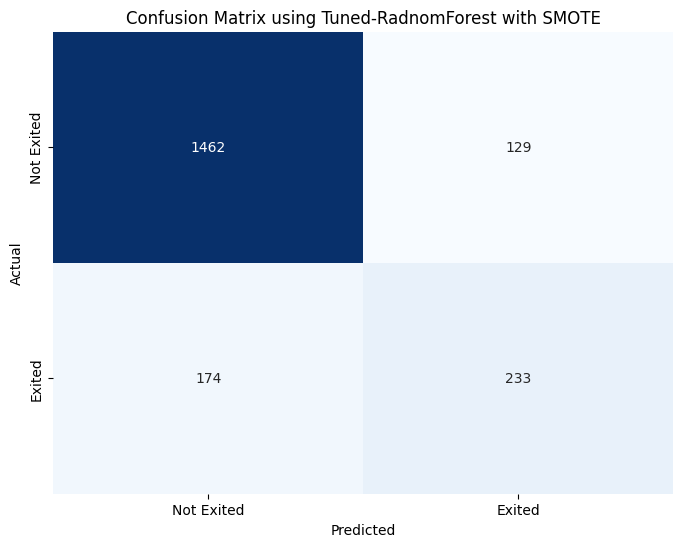

In [48]:
## Confusion Matrix using RF with SMOTE
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test_forest_tuned), annot=True, cbar=False,
            fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix using Tuned-RadnomForest with SMOTE')
plt.show()

----

* `Final Comparison`

In [49]:
## Create lists for the scores
train_scores = [score_train_log, score_train_gauss_nb, score_train_forest, score_train_forest_tuned]
test_scores = [score_test_log, score_test_gauss_nb, score_test_forest, score_test_forest_tuned]

## Create a DataFrame
model_names = ['Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest', 'Tuned Random Forest']
df_scores = pd.DataFrame({
            'Model': model_names,
            'Train Score': train_scores,
            'Test Score': test_scores
                        })
# Sort descending by test scores
df_scores.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
3,Tuned Random Forest,0.661033,0.605982
2,Random Forest,0.615588,0.597403
1,Gaussian Naive Bayes,0.511883,0.511868
0,Logistic Regression,0.493136,0.506750


In [50]:
## Tuned Random Forest is outperforming the whole other models --> Use it in Deployment :D

## Downlaod Tuned-RF-with-SMOTE which is the best
joblib.dump(forest_tuned, os.path.join(ASSETS_FOLDER_PATH, 'Tuned-RF-with-SMOTE.pkl'))

['d:\\Private\\AI MAIN\\02- Private AGOOR\\_AGOOR Sheets\\General Code\\Wakeb-Task\\Churn-LLM\\src\\notebooks\\..\\assets\\Tuned-RF-with-SMOTE.pkl']

-----